In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

from scipy.stats import ttest_1samp

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
null = ((df.isnull().sum()/df.shape[0])*100).sort_values(ascending = False)

In [7]:
null.head(18)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
dtype: float64

# Aqui checamos cuales son las columnas en las que hay menos datos 

## Podemos ver que la mayoría de los datos nulos vienen de 
PoolQC          99.520548

MiscFeature     96.301370

Alley           93.767123

Fence           80.753425

FireplaceQu     47.260274

LotFrontage     17.739726

## Tenemos que checar que estos datos no afecten mucho nuestro análisis estadístico, por lo que obtendremos su p-value para ver si es de importancia

In [8]:
df_pool = df[['SalePrice','PoolArea','PoolQC']]

model = ols('SalePrice ~ C(PoolArea)', data = df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(PoolArea),3.356503e+11,7.0,7.847318,2.341047e-09
Residual,8.872261e+12,1452.0,NaN,NaN


In [9]:
# podemos ver que el valor p no es suficiente como para afectar nuestros resultados


In [10]:
df_misc = df[['SalePrice','Alley']].notnull()

model = ols('SalePrice ~ C(Alley)', data = df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Alley),4.721637e+10,1.0,35.56206,4.899826e-08
Residual,1.181669e+11,89.0,NaN,NaN


In [11]:
df_misc = df[['SalePrice','Fence']].notnull()

model = ols('SalePrice ~ C(Fence)', data = df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Fence),5.494735e+10,3.0,4.948159,0.002313
Residual,1.025325e+12,277.0,NaN,NaN


In [12]:
df_misc = df[['SalePrice','FireplaceQu']].notnull()

model = ols('SalePrice ~ C(FireplaceQu)', data = df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(FireplaceQu),6.561883e+11,4.0,24.398929,5.016300e-19
Residual,5.143505e+12,765.0,NaN,NaN


# se van a quitar las 6 variables con más datos nulos ya que no afectarán de manera importante nuestro análisis

In [13]:
df_1 = df.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage'],axis = 1)
df_1.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [14]:
df_1 = df_1.fillna('None')

In [15]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotArea        1460 non-null   int64 
 4   Street         1460 non-null   object
 5   LotShape       1460 non-null   object
 6   LandContour    1460 non-null   object
 7   Utilities      1460 non-null   object
 8   LotConfig      1460 non-null   object
 9   LandSlope      1460 non-null   object
 10  Neighborhood   1460 non-null   object
 11  Condition1     1460 non-null   object
 12  Condition2     1460 non-null   object
 13  BldgType       1460 non-null   object
 14  HouseStyle     1460 non-null   object
 15  OverallQual    1460 non-null   int64 
 16  OverallCond    1460 non-null   int64 
 17  YearBuilt      1460 non-null   int64 
 18  YearRemodAdd   1460 non-null

In [16]:
df_1['MasVnrArea'] = df_1['MasVnrArea'].replace(['None', 0])

In [17]:
df_1['MasVnrArea'].astype('int64')

0       196
1       196
2       162
3       162
4       350
       ... 
1455     80
1456    119
1457    119
1458    119
1459    119
Name: MasVnrArea, Length: 1460, dtype: int64

# En este paso vamos a ver cuales son las variables que guardan una mayor correlación con el precio de casa 

In [18]:
corr = df_1[df_1.columns[1:]].corr()['SalePrice'][:].sort_values(ascending = False).reset_index()
corr

,index,SalePrice
0,SalePrice,1.000000
1,OverallQual,0.790982
2,GrLivArea,0.708624
3,GarageCars,0.640409
4,GarageArea,0.623431
5,TotalBsmtSF,0.613581
6,1stFlrSF,0.605852
7,FullBath,0.560664
8,TotRmsAbvGrd,0.533723
9,YearBuilt,0.522897


# Escogemos las correlaciones más fuertes para no tener muchos outliers y poder tener las variables que afecten verdaderamente el precio de la casa


# Correlación igual o mayor a 0.5 

In [19]:
df_corr = df_1[corr[corr['SalePrice']>=0.5]['index']]
df_corr


,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,208500,7,1710,2,548,856,856,2,8,2003,2003
1,181500,6,1262,2,460,1262,1262,2,6,1976,1976
2,223500,7,1786,2,608,920,920,2,6,2001,2002
3,140000,7,1717,3,642,756,961,1,7,1915,1970
4,250000,8,2198,3,836,1145,1145,2,9,2000,2000
...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,6,1647,2,460,953,953,2,7,1999,2000
1456,210000,6,2073,2,500,1542,2073,2,7,1978,1988
1457,266500,7,2340,1,252,1152,1188,2,9,1941,2006
1458,142125,5,1078,1,240,1078,1078,1,5,1950,1996


<AxesSubplot:>

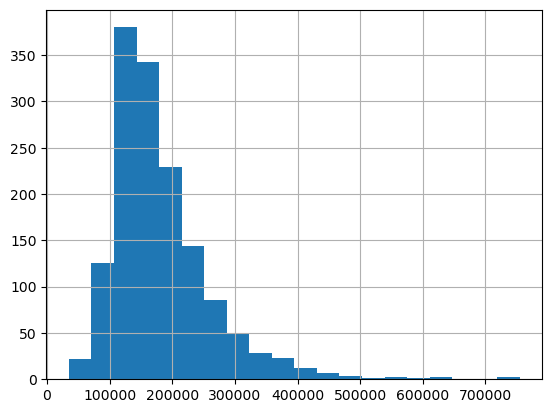

In [20]:
df_1['SalePrice'].hist(bins = 20)

<AxesSubplot:>

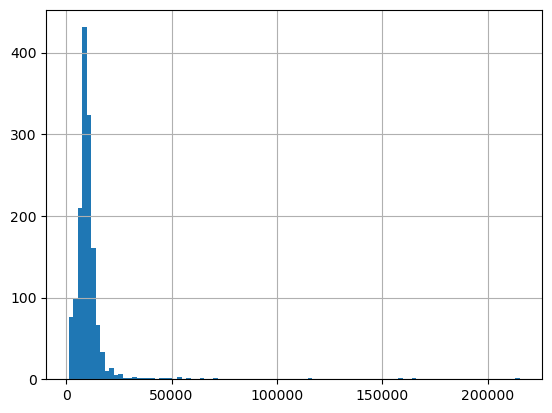

In [21]:
df_1['LotArea'].hist(bins = 100)

<AxesSubplot:title={'center':'Precio medio segun el año de venta'}, xlabel='YrSold'>

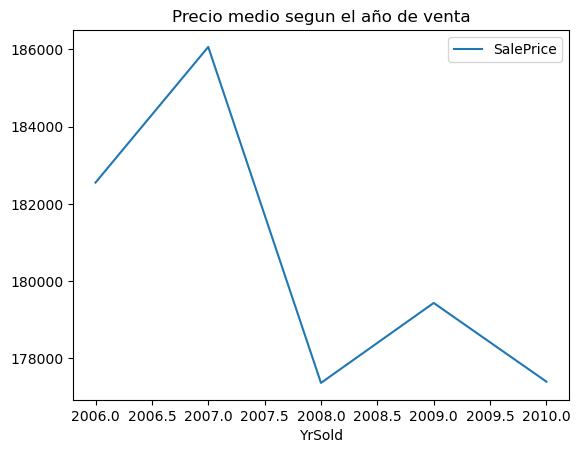

In [22]:
df_1[['YrSold','SalePrice']].groupby('YrSold').mean().plot(kind='line', title ='Precio medio segun el año de venta')

<AxesSubplot:title={'center':'Precio medio segun año de construcción'}, xlabel='YearBuilt'>

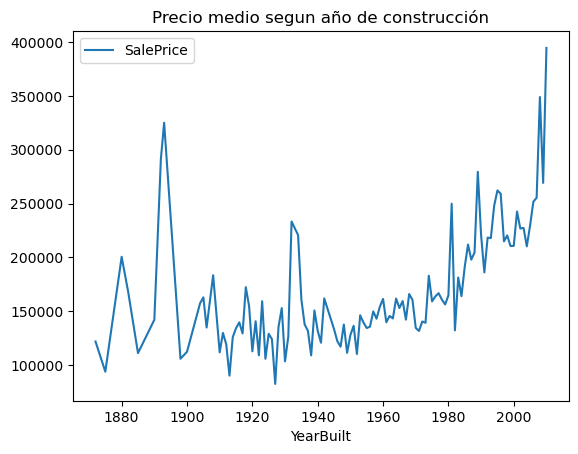

In [23]:
df_1[['YearBuilt','SalePrice']].groupby('YearBuilt').mean().plot(kind='line', title = 'Precio medio segun año de construcción')

# Después haremos diseñaremos una función para ver la media de los precios de las casas vendidas según sus atributos Tomando una muestra de 1000 datos 

In [29]:
def generate_means(data): 
    means = []
    for i in range(1000): 
        #Obtener los samples en grupos de 50. 
        samples = np.random.choice(data,50,replace = True)
        #Calcula la media de cada uno de los atributos que le damos a la funcion
        means.append(samples.mean())
    
    return means

In [30]:
all_houses = df_1['SalePrice']
garage = df_1['SalePrice'][df_1['GarageCars'] > 0]
full_bath = df_1['SalePrice'][df_1['FullBath'] > 1]

medias_garage = generate_means(garage)
medias_full_bath = generate_means(full_bath)
medias_all_houses = generate_means(all_houses)

print(f'La media de precio de TODAS las casas : {all_houses.mean()}')
print(f'La media de precio de las casas con garage: {garage.mean()}')
print(f'La media de precio de las casas con baño completo: {full_bath.mean()}')

La media de precio de TODAS las casas : 180921.19589041095
La media de precio de las casas con garage: 185479.511240029
La media de precio de las casas con baño completo: 218563.92259675407
